In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('../dataset/GOOG-year.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-02,778.200012,781.650024,763.450012,768.700012,768.700012,1872400
1,2016-11-03,767.250000,769.950012,759.030029,762.130005,762.130005,1943200
2,2016-11-04,750.659973,770.359985,750.560974,762.020020,762.020020,2134800
3,2016-11-07,774.500000,785.190002,772.549988,782.520020,782.520020,1585100
4,2016-11-08,783.400024,795.632996,780.190002,790.510010,790.510010,1350800


In [12]:
def buy_stock(
    real_movement,
    delay = 5,
    initial_state = 1,
    initial_money = 10000,
    max_buy = 20,
    max_sell = 20,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    delay_change_decision = delay
    current_decision = 0
    state = initial_state
    current_val = real_movement[0]
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    if state == 1:
        initial_money, current_inventory = buy(
            0, initial_money, current_inventory
        )

    for i in range(1, real_movement.shape[0], 1):
        if real_movement[i] < current_val and state == 0:
            if current_decision < delay_change_decision:
                current_decision += 1
            else:
                state = 1
                initial_money, current_inventory = buy(
                    i, initial_money, current_inventory
                )
                current_decision = 0
                states_buy.append(i)
        if real_movement[i] > current_val and state == 1:
            if current_decision < delay_change_decision:
                current_decision += 1
            else:
                state = 0

                if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
                else:
                    if current_inventory > max_sell:
                        sell_units = max_sell
                    else:
                        sell_units = current_inventory
                    current_inventory -= sell_units
                    total_sell = sell_units * real_movement[i]
                    initial_money += total_sell
                    try:
                        invest = (
                            (real_movement[i] - real_movement[states_buy[-1]])
                            / real_movement[states_buy[-1]]
                        ) * 100
                    except:
                        invest = 0
                    print(
                        'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                        % (i, sell_units, total_sell, invest, initial_money)
                    )

                current_decision = 0
                states_sell.append(i)
        current_val = real_movement[i]
    invest = ((initial_money - starting_money) / starting_money) * 100
    print(
        '\ntotal gained %f, total investment %f %%'
        % (initial_money - starting_money, invest)
    )
    plt.figure(figsize = (20, 10))
    plt.plot(real_movement, label = 'true close')
    plt.plot(
        real_movement,
        'X',
        label = 'predict buy',
        markevery = states_buy,
        c = 'b',
    )
    plt.plot(
        real_movement,
        'o',
        label = 'predict sell',
        markevery = states_sell,
        c = 'r',
    )
    plt.legend()
    plt.show()

day 0: buy 13 units at price 9993.100156, total balance 6.899844
day 11, sell 13 units at price 10025.989740, investment 0.329123 %, total balance 10032.889584,
day 20: buy 13 units at price 9722.959779, total balance 309.929805
day 26, sell 13 units at price 10260.769714, investment 5.531340 %, total balance 10570.699519,
day 36: buy 13 units at price 10268.829649, total balance 301.869870
day 44, sell 13 units at price 10479.950312, investment 2.055937 %, total balance 10781.820182,
day 57: buy 12 units at price 9985.800288, total balance 796.019894
day 67, sell 12 units at price 9714.719976, investment -2.714658 %, total balance 10510.739870,
day 81: buy 12 units at price 9967.560060, total balance 543.179810
day 88, sell 12 units at price 10146.479736, investment 1.795020 %, total balance 10689.659546,
day 97: buy 13 units at price 10587.589909, total balance 102.069637
day 103, sell 13 units at price 10901.149844, investment 2.961580 %, total balance 11003.219481,
day 109: buy 13 

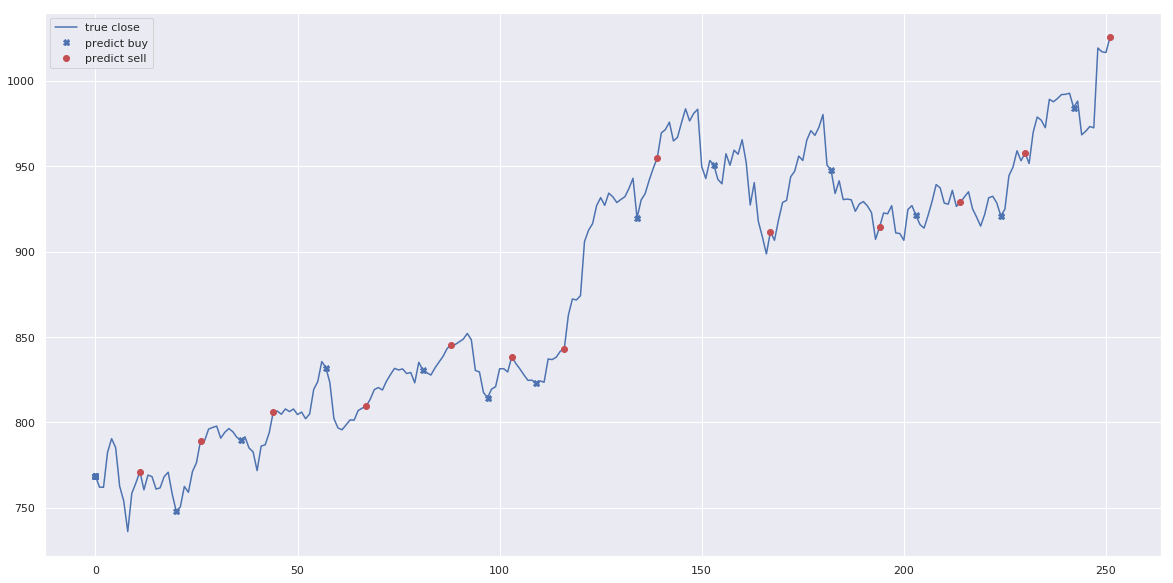

In [13]:
buy_stock(df.Close, initial_state = 1, delay = 4, initial_money = 10000)